In [31]:
import pandas as pd
import matplotlib.pyplot as plt

import passenger
from netam import framework

compare_df = pd.read_csv("output/passenger/chigy_hc_mutation_rates_nt_extras.csv", index_col=0)
compare_df['matches_RGYW'] = compare_df['Fivemer'].apply(passenger.matches_RGYW)
crepe_igh_fivemer = framework.load_crepe("/Users/matsen/re/netam-experiments-1/pretrained/mm_fivemer")
crepe_igh_cnn = framework.load_crepe("/Users/matsen/re/netam-experiments-1/pretrained/mm_cnn_sml")
chigy_stop_trimmed = passenger.CHIGY_HC_STOP_TRIMMED
models = {
    "netam_fivemer": crepe_igh_fivemer,
    "netam_cnn": crepe_igh_cnn,
}
for model_name, model in models.items():
    compare_df[model_name] = model([chigy_stop_trimmed]).cpu().detach().numpy().squeeze()[:len(compare_df)]
    compare_df[model_name] = compare_df[model_name] / compare_df[model_name].sum()

In [32]:
compare_df.head().to_clipboard()

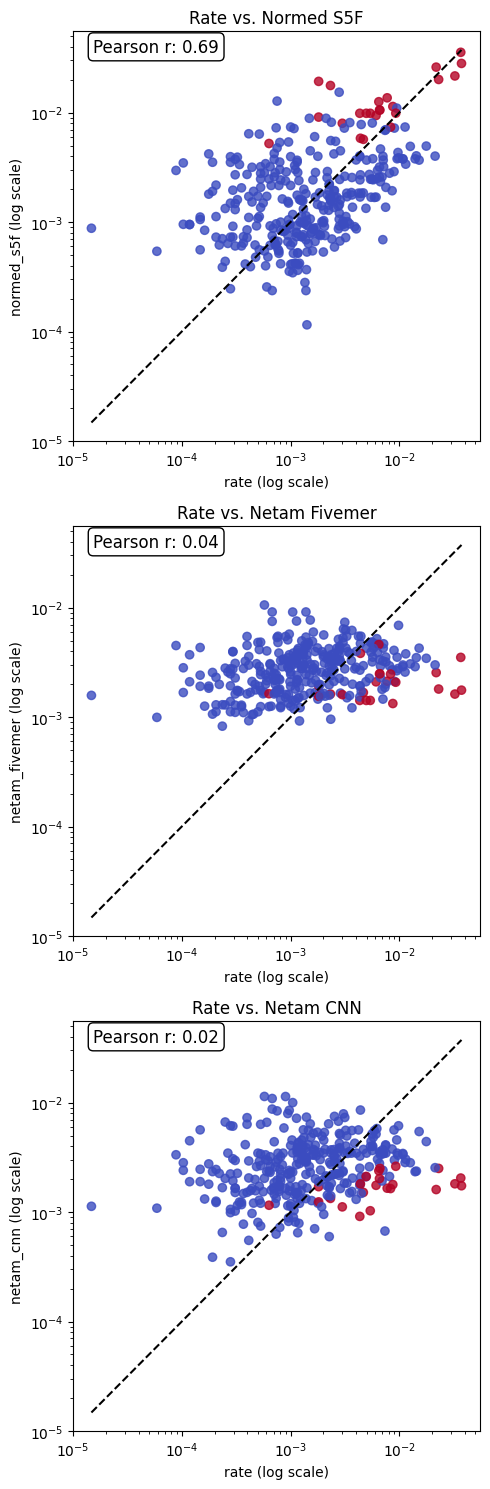

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

def plot_column_comparison(df, x_col, y_col, ax, title="", color_col=None, cmap="coolwarm"):
    scatter = ax.scatter(
        df[x_col], df[y_col], c=df[color_col] if color_col else None, cmap=cmap, alpha=0.8
    )

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_xlabel(f"{x_col} (log scale)")
    ax.set_ylabel(f"{y_col} (log scale)")

    # Calculate Pearson correlation
    corr, _ = pearsonr(df[x_col], df[y_col])
    ax.annotate(
        f"Pearson r: {corr:.2f}",
        xy=(0.05, 0.95),
        xycoords="axes fraction",
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
    )

    ax.set_title(title)

    # Add y=x line
    min_limit = min(df[x_col].min(), df[y_col].min())
    max_limit = max(df[x_col].max(), df[y_col].max())
    ax.plot([min_limit, max_limit], [min_limit, max_limit], "k--")  # Add x=y line

# Plotting the comparisons
fig, axs = plt.subplots(3, 1, figsize=(5, 15))

plot_column_comparison(compare_df, 'rate', 'normed_s5f', axs[0], title="Rate vs. Normed S5F", color_col="matches_RGYW")
plot_column_comparison(compare_df, 'rate', 'netam_fivemer', axs[1], title="Rate vs. Netam Fivemer", color_col="matches_RGYW")
plot_column_comparison(compare_df, 'rate', 'netam_cnn', axs[2], title="Rate vs. Netam CNN", color_col="matches_RGYW")

plt.tight_layout()
plt.show()


<Axes: xlabel='rate', ylabel='netam_fivemer'>

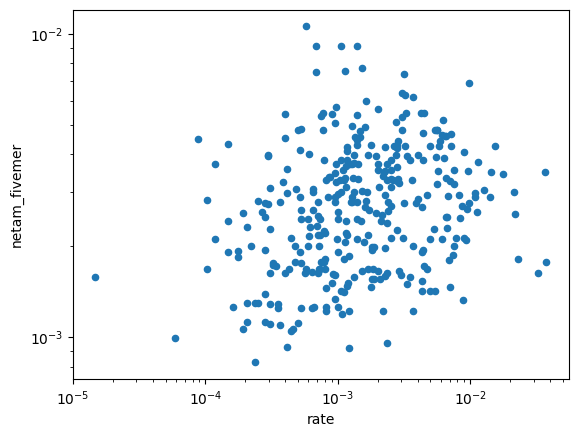

In [29]:
compare_df.plot.scatter(x='rate', y='netam_fivemer', loglog=True)

<Axes: xlabel='rate', ylabel='normed_s5f'>

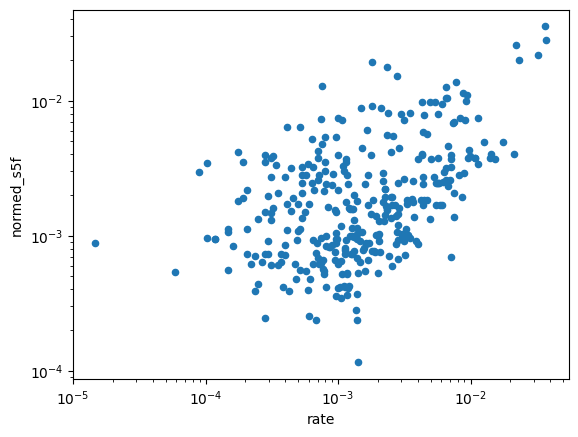

In [15]:
compare_df.plot.scatter(x='rate', y='normed_s5f', loglog=True)